<a href="https://colab.research.google.com/github/Diacod-I/congeny/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

In [37]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [68]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
data.data.shape

(569, 30)

In [41]:
X = pd.DataFrame(data['data'])
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
print(data.target_names,'\n')
print(data.target.shape,'\n')
Y = pd.DataFrame(data.target)
Y

['malignant' 'benign'] 

(569,) 



,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [116]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain = scaler.fit_transform(Xtrain)
xtest = scaler.transform(Xtest)

In [118]:
values,features = Xtrain.shape
values,features

(398, 30)

In [119]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(features,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),loss='binary_crossentropy',metrics='accuracy')

In [121]:
bler = model.fit(xtrain,Ytrain,epochs=100,validation_data=(xtest,Ytest))

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.8419 - accuracy: 0.4673 - val_loss: 0.7458 - val_accuracy: 0.5439
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7187 - accuracy: 0.5879 - val_loss: 0.6478 - val_accuracy: 0.6491
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.6884 - val_loss: 0.5683 - val_accuracy: 0.7544
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5472 - accuracy: 0.7513 - val_loss: 0.5049 - val_accuracy: 0.7895
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4889 - accuracy: 0.7915 - val_loss: 0.4552 - val_accuracy: 0.8363
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.8342 - val_loss: 0.4152 - val_accuracy: 0.8713
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4046 - accuracy: 0.8593 - val_loss: 0.3796 - val_accuracy: 0.8889
Epoch 8/100


In [125]:
y_pred = model.predict(xtest)
y_pred = np.round(y_pred).flatten()
y_pred

6/6 [==============================] - 0s 2ms/step


array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1.], dtype=float32)

In [126]:
print("Training Score:",model.evaluate(xtrain,Ytrain))
print("Test Score:",model.evaluate(xtest,Ytest))

13/13 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9799
Training Score: [0.0863618329167366, 0.979899525642395]
6/6 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9883
Test Score: [0.06999723613262177, 0.988304078578949]


In [127]:
xtst = np.array(xtest)
xtst.shape

(171, 30)

In [129]:
ytest = np.array(Ytest).ravel()
ytest.shape

(171,)

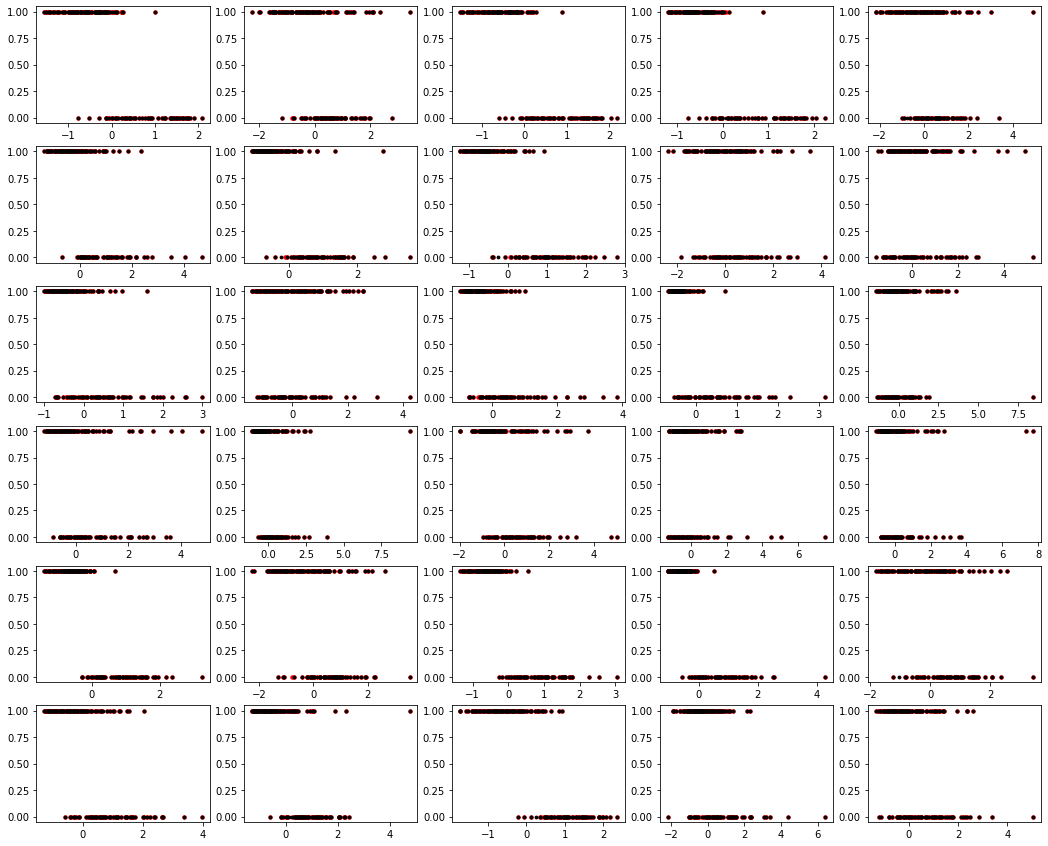

In [143]:
fig,ax = plt.subplots(6,5,figsize=(18,15))
for i in range(0,6):
  for j in range(0,5):   
    ax[i][j].scatter(xtst[:,(i*5)+j],ytest,c='r',s=12)
    ax[i][j].scatter(xtst[:,(i*5)+j],y_pred,c='k',s=8)

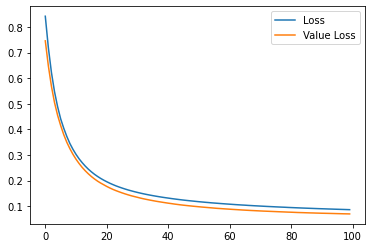

In [137]:
plt.plot(bler.history['loss'],label='Loss')
plt.plot(bler.history['val_loss'],label='Value Loss')
plt.legend()

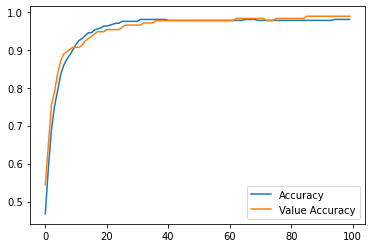

In [138]:
plt.plot(bler.history['accuracy'],label='Accuracy')
plt.plot(bler.history['val_accuracy'],label='Value Accuracy')
plt.legend()

In [140]:
print("Accuracy of Prediction:",y_pred==ytest,'\n')
print("Manually Calculated Accuracy:", np.mean(y_pred==ytest),'\n')
evel=model.evaluate(xtest,ytest)
print("\nEvaluated Accuracy:",evel[1],"\nEvaluated Loss:",evel[0])

Accuracy of Prediction: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

In [141]:
model.save('BreastCancerModel.hdf5')